# Categorical Variables

In this second notebook, we will discuss categorical variables. This is the second lecture of feature engineering for machine learning course. We will start by briefly defining what a categorical variable is and dividing it into two groups: ordinal and nominal.

## Variable - Numerical and Categorical

In general, we can define a variable as a quantity that can be measured or counted. We named it a "variable" because this quantity can assume different values that vary in different ways. There are infinitely many examples of what a variable can be:
- Age ($10$, $12$, $20$, etc);
- Gender (male, female);
- Income ($\textrm{R\$}\:2500$, $\textrm{R\$}\:9750$, etc)
- Country Birth (Brazil, Argentina, USA, Japan, etc)
- Taxi Fares ($\textrm{USD}\:12,00$, $\textrm{USD}\:30,50$, etc)

Usually, a variable can be classified in two groups:
1) **Numerical variables**
2) **Categorical variables**

### 2) Categorical Variables

A variable is said to be **categorical** if it belongs to a group of **categories**. For example, if we are dealing with gender variable it is a categorical variable once it can assume male or female values. Marital status is another categorical variable - once it can assume single, married or divorced values. If we are dealing with a variable that represents companies that provide a certain type of product, this is also a categorical variable. 

Categorical variable can be divided into two groups:
- **Ordinal Variables**
- **Nominal Variables**

### Ordinal Variables

A categorical variable is said to be a ordinal categorical variable if there is a meaningfully order for its values. Typical examples are:
- Grade on exams: A, B, C, D and E, for example, represent a sequence from the best grade to the worst one;
- Days of week: from Monday (day 1) to Sunday (day 7).

### Nominal Variables

A categorical variable is said to be a nominal categorical variable if there is no meaningfully order for its value. Some examples are:
- Color of something: blue, yellow, red, green, etc;
- Cities: New York, São Paulo, Tokyo, etc.

In this case, there is nothing indicating an intrinsic order for the values.

==================================================================================

## Hands-On: Peer-to-peer lending dataset

Let us continuing our analysis using peer-to-peer lending dataset but now studying the categorical variables present on this dataset.

In [1]:
# importing basic libraries
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# loading the data 
data_path = '../datasets/loan.csv'
lending_data = pd.read_csv(data_path)
lending_data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


The definition of categorical variables are:
- `loan_purpose`: intended use of the loan
- `market`: the risk market assigned to the borrower (based in their financial situation)
- `householder`: whether the borrower owns or rents their property

For these three variables, `loan_purpose` and `householder` are nominal. The feature `market` is ordinal. Let us start by looking at the `loan_purpose` feature.

### a) Nominal Variables

In [3]:
# loan purpose - array of values
lending_data['loan_purpose'].unique()

array(['Debt consolidation', 'Car purchase', 'Other', 'Home improvements',
       'Moving home', 'Health', 'Holidays', 'Wedding'], dtype=object)

These categories represent the intended use of the loan. Let's see the barplot for this feature:

Text(0, 0.5, 'Number of Customers')

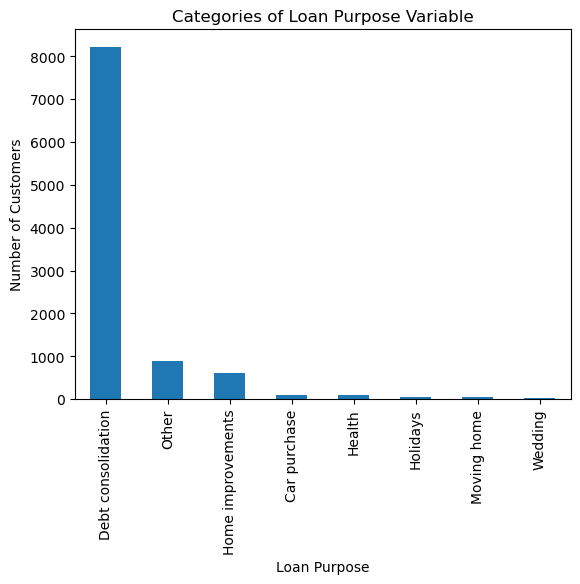

In [7]:
# barplot - loan_purpose
fig = lending_data['loan_purpose'].value_counts().plot.bar()
fig.set_title('Categories of Loan Purpose Variable')
fig.set_xlabel('Loan Purpose')
fig.set_ylabel('Number of Customers')

As we see, almost all loan purposes are concentrated in "Debt Consolidation". This is expect once debtors plan to use the money to consolidate their financial debts.

Let us see the `householder` variable:

In [8]:
# household - array of values
lending_data['householder'].unique()

array(['RENT', 'OWNER', 'MORTGAGE'], dtype=object)

These three values indicate whether the borrowers own, rent, or mortgage their home. Let us see the barplot of this feature:

Text(0, 0.5, 'Number of Customers')

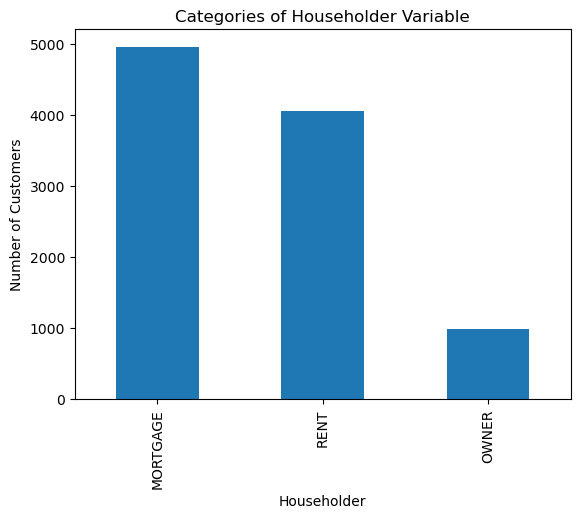

In [9]:
# household - a barplot of values
fig = lending_data['householder'].value_counts().plot.bar()
fig.set_title('Categories of Householder Variable')
fig.set_xlabel('Householder')
fig.set_ylabel('Number of Customers')

Most borrowers own their homes on mortgages or in rentals and only a minority own their homes outright.

In [10]:
lending_data['householder'].value_counts()

householder
MORTGAGE    4957
RENT        4055
OWNER        988
Name: count, dtype: int64

### b) Ordinal Variables

For ordinal variable we will analyze `market` variable. Let us see its values:

In [11]:
# market - array of values
lending_data['market'].unique()

array(['C', 'B', 'A', 'E', 'D'], dtype=object)

The categories range from A to E and indicate the customer's risk. A client with index A and B is the least risky, while a client with index E is the highest risk. The greater the risk, the more likely the client will default. Therefore, lenders charge riskier customers with a higher interest rate.

Text(0, 0.5, 'Number of Customers')

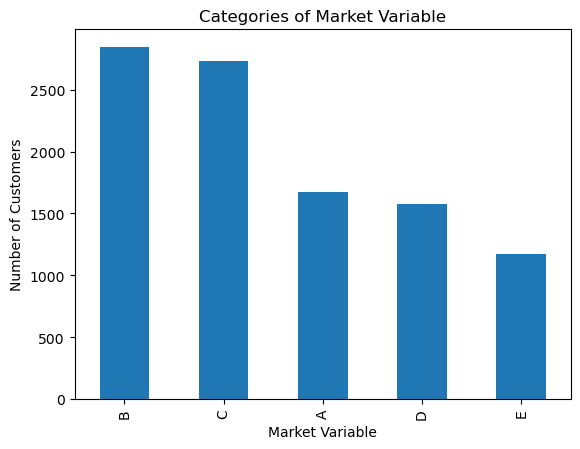

In [12]:
# market - a barplot of its values
fig = lending_data['market'].value_counts().plot.bar()
fig.set_title('Categories of Market Variable')
fig.set_xlabel('Market Variable')
fig.set_ylabel('Number of Customers')

We see the most customers are in B and C categories, representing good and medium risk. Only few customers have high risk and high probability of default.